In [1]:
import h5py
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from datetime import datetime, timezone, timedelta
import math

In [2]:
# Helper function to read dataset from hdf5 reference
def read_hdf5_dataset(f, ref):
    return np.array(f[ref])

In [3]:
# Load the HDF5 file
file_path = "../../Data/Field/data_1.mat"
with h5py.File(file_path, 'r') as f:
    # Extract sensor data
    # Navigate through the HDF5 hierarchy to access the data
    data = f['data']
    sensor0 = data['sensor0']
    S1_resistance0 = sensor0['resistance0']
    S1_resistance1 = sensor0['resistance1']
    S1_resistance2 = sensor0['resistance2']
    S1_resistance3 = sensor0['resistance3']
    
    # Convert the dataset to a NumPy array
    S1_resistance0_array = np.log(S1_resistance0[:].T)
    S1_resistance1_array = np.log(S1_resistance1[:].T)
    S1_resistance2_array = np.log(S1_resistance2[:].T)
    S1_resistance3_array = np.log(S1_resistance3[:].T)

    sensor1 = data['sensor1']
    S2_resistance0 = sensor1['resistance0']
    S2_resistance1 = sensor1['resistance1']
    S2_resistance2 = sensor1['resistance2']
    S2_resistance3 = sensor1['resistance3']
    
    # Convert the dataset to a NumPy array
    S2_resistance0_array = np.log(S2_resistance0[:].T)
    S2_resistance1_array = np.log(S2_resistance1[:].T)
    S2_resistance2_array = np.log(S2_resistance2[:].T)
    S2_resistance3_array = np.log(S2_resistance3[:].T)


    targets_S1 = {key: sensor0['targets'][key][0] for key in sensor0['targets']}
    targets_S2 = {key: sensor1['targets'][key][0] for key in sensor1['targets']}
    counter = 1
    for i in range(targets_S1['fieldtest'].shape[0]):
        if not math.isnan(targets_S1['lab'][i]):
            targets_S1['fieldtest'][i] = float('nan')
        else:
            targets_S1['fieldtest'][i] = counter
            counter = counter +1
    
    counter = 1
    for i in range(targets_S2['fieldtest'].shape[0]):
        if not math.isnan(targets_S2['lab'][i]):
            targets_S2['fieldtest'][i] = float('nan')
        else:
            targets_S2['fieldtest'][i] = counter
            counter = counter +1

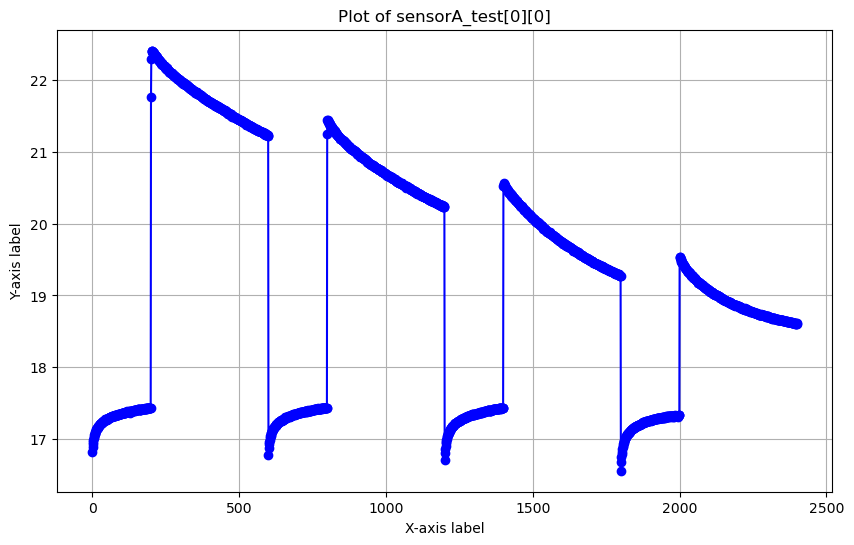

In [4]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(S2_resistance0_array[1000,:], marker='o', linestyle='-', color='b')  # Customize the plot as needed
plt.xlabel('X-axis label')  # Customize as needed
plt.ylabel('Y-axis label')  # Customize as needed
plt.title('Plot of sensorA_test[0][0]')  # Customize as needed
plt.grid(True)
plt.show()

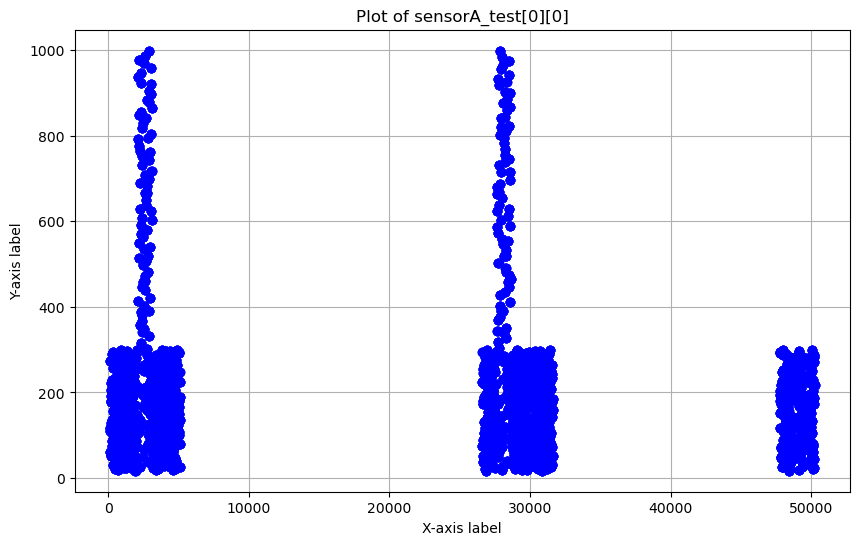

In [5]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(targets_S1['acetone'], marker='o', linestyle='-', color='b')  # Customize the plot as needed
plt.xlabel('X-axis label')  # Customize as needed
plt.ylabel('Y-axis label')  # Customize as needed
plt.title('Plot of sensorA_test[0][0]')  # Customize as needed
plt.grid(True)
plt.show()

In [6]:
# Save the sorted data to new MAT files
sio.savemat("../../Data/Field/sensorA.mat", {"sensorA_sub1": S1_resistance0_array, "sensorA_sub2": S1_resistance1_array, "sensorA_sub3": S1_resistance2_array, "sensorA_sub4": S1_resistance3_array})
sio.savemat("../../Data/Field/sensorB.mat", {"sensorB_sub1": S2_resistance0_array, "sensorB_sub2": S2_resistance1_array, "sensorB_sub3": S2_resistance2_array, "sensorB_sub4": S2_resistance3_array})
targets = targets_S1
sio.savemat("../../Data/Field/targetsSA.mat", targets)
targets = targets_S2
sio.savemat("../../Data/Field/targetsSB.mat", targets)

Matlab Script to get reference isntruments in target

load('C:\Users\yanni\OneDrive\Desktop\Arbeit\ChatGPTTests\TCOCNN_Python\Data\Field\data.mat')

% Initialize the new array
RCP_hydrogen = NaN(size(data.sensor0.targets.time));
GCMS_toluene = NaN(size(data.sensor0.targets.time));
Xpid_toluene = NaN(size(data.sensor0.targets.time));
Xpid_acetone = NaN(size(data.sensor0.targets.time));
Xpid_xylene = NaN(size(data.sensor0.targets.time));
Xpid_isopropyl = NaN(size(data.sensor0.targets.time));

% Populate the new array
idx = 1;
for i = 1:length(data.sensor0.targets.time)
    target_time = data.sensor0.targets.time(i);
    
    if minutes(target_time - data.reference.RCP.time(idx)) > 1
        idx = idx+1;
    end

    % Check reference1_time
    ref_value = find_reference_value(target_time, data.reference.RCP.time(idx), data.reference.RCP.hydrogen(idx));
    
    if ~isnan(ref_value)
        RCP_hydrogen(i) = ref_value;
        idx= idx+1;
        if idx > length(data.reference.RCP.hydrogen)
            break
        end
        continue;
    end
    
end

% Populate the new array
idx = 1;
for i = 1:length(data.sensor0.targets.time)
    target_time = data.sensor0.targets.time(i);

    if minutes(target_time - data.reference.GCMS.time(idx)) > 1
        idx = idx+1
    end
    
    % Check reference1_time
    ref_value = find_reference_value(target_time, data.reference.GCMS.time(idx), data.reference.GCMS.toluene(idx));
    if ~isnan(ref_value)
        GCMS_toluene(i) = ref_value;
        idx= idx+1;
        if idx > length(data.reference.GCMS.toluene)
            break
        end
        continue;
    end
    
end

% Populate the new array
idx = 1;
for i = 1:length(data.sensor0.targets.time)
    target_time = data.sensor0.targets.time(i);

    if minutes(target_time - data.reference.Xpid.xylene.time(idx)) > 1
        idx = idx+1
    end
    
    % Check reference1_time
    ref_value = find_reference_value(target_time, data.reference.Xpid.xylene.time(idx), data.reference.Xpid.xylene.concentration(idx));
    if ~isnan(ref_value)
        Xpid_xylene(i) = ref_value;
        idx= idx+1;
        if idx > length(data.reference.Xpid.xylene.concentration)
            break
        end
        continue;
    end
    
end

% Populate the new array
idx = 1;
for i = 1:length(data.sensor0.targets.time)
    target_time = data.sensor0.targets.time(i);

    if minutes(target_time - data.reference.Xpid.acetone.time(idx)) > 1
        idx = idx+1
    end
    
    % Check reference1_time
    ref_value = find_reference_value(target_time, data.reference.Xpid.acetone.time(idx), data.reference.Xpid.acetone.concentration(idx));
    if ~isnan(ref_value)
        Xpid_acetone(i) = ref_value;
        idx= idx+1;
        if idx > length(data.reference.Xpid.acetone.concentration)
            break
        end
        continue;
    end
    
end

% Populate the new array
idx = 1;
for i = 1:length(data.sensor0.targets.time)
    target_time = data.sensor0.targets.time(i);

    if minutes(target_time - data.reference.Xpid.isopropyl.time(idx)) > 1
        idx = idx+1
    end
    
    % Check reference1_time
    ref_value = find_reference_value(target_time, data.reference.Xpid.isopropyl.time(idx), data.reference.Xpid.isopropyl.concentration(idx));
    if ~isnan(ref_value)
        Xpid_isopropyl(i) = ref_value;
        idx= idx+1;
        if idx > length(data.reference.Xpid.isopropyl.concentration)
            break
        end
        continue;
    end
    
end

% Populate the new array
idx = 1;
for i = 1:length(data.sensor0.targets.time)
    target_time = data.sensor0.targets.time(i);

    if minutes(target_time - data.reference.Xpid.tolene.time(idx)) > 1
        idx = idx+1
    end
    
    % Check reference1_time
    ref_value = find_reference_value(target_time, data.reference.Xpid.tolene.time(idx), data.reference.Xpid.toluene.concentration(idx));
    if ~isnan(ref_value)
        Xpid_toluene(i) = ref_value;
        idx= idx+1;
        if idx > length(data.reference.Xpid.toluene.concentration)
            break
        end
        continue;
    end
    
end

data.sensor0.targets.Xpid_xylene = Xpid_xylene;
data.sensor0.targets.Xpid_toluene = Xpid_toluene;
data.sensor0.targets.Xpid_isopropyl = Xpid_isopropyl;
data.sensor0.targets.Xpid_acetone = Xpid_acetone;
data.sensor0.targets.RCP_hydrogen = RCP_hydrogen;
data.sensor0.targets.GCMS_toluene = GCMS_toluene;

New Sensor
% Initialize the new array
RCP_hydrogen = NaN(size(data.sensor1.targets.time));
GCMS_toluene = NaN(size(data.sensor1.targets.time));
Xpid_toluene = NaN(size(data.sensor1.targets.time));
Xpid_acetone = NaN(size(data.sensor1.targets.time));
Xpid_xylene = NaN(size(data.sensor1.targets.time));
Xpid_isopropyl = NaN(size(data.sensor1.targets.time));

% Populate the new array
idx = 1;
for i = 1:length(data.sensor1.targets.time)
    target_time = data.sensor1.targets.time(i);
    
    if minutes(target_time - data.reference.RCP.time(idx)) > 1
        idx = idx+1;
    end

    % Check reference1_time
    ref_value = find_reference_value(target_time, data.reference.RCP.time(idx), data.reference.RCP.hydrogen(idx));
    
    if ~isnan(ref_value)
        RCP_hydrogen(i) = ref_value;
        idx= idx+1;
        if idx > length(data.reference.RCP.hydrogen)
            break
        end
        continue;
    end
    
end

% Populate the new array
idx = 1;
for i = 1:length(data.sensor1.targets.time)
    target_time = data.sensor1.targets.time(i);

    if minutes(target_time - data.reference.GCMS.time(idx)) > 1
        idx = idx+1
    end
    
    % Check reference1_time
    ref_value = find_reference_value(target_time, data.reference.GCMS.time(idx), data.reference.GCMS.toluene(idx));
    if ~isnan(ref_value)
        GCMS_toluene(i) = ref_value;
        idx= idx+1;
        if idx > length(data.reference.GCMS.toluene)
            break
        end
        continue;
    end
    
end

% Populate the new array
idx = 1;
for i = 1:length(data.sensor1.targets.time)
    target_time = data.sensor1.targets.time(i);

    if minutes(target_time - data.reference.Xpid.xylene.time(idx)) > 1
        idx = idx+1
    end
    
    % Check reference1_time
    ref_value = find_reference_value(target_time, data.reference.Xpid.xylene.time(idx), data.reference.Xpid.xylene.concentration(idx));
    if ~isnan(ref_value)
        Xpid_xylene(i) = ref_value;
        idx= idx+1;
        if idx > length(data.reference.Xpid.xylene.concentration)
            break
        end
        continue;
    end
    
end

% Populate the new array
idx = 1;
for i = 1:length(data.sensor1.targets.time)
    target_time = data.sensor1.targets.time(i);

    if minutes(target_time - data.reference.Xpid.acetone.time(idx)) > 1
        idx = idx+1
    end
    
    % Check reference1_time
    ref_value = find_reference_value(target_time, data.reference.Xpid.acetone.time(idx), data.reference.Xpid.acetone.concentration(idx));
    if ~isnan(ref_value)
        Xpid_acetone(i) = ref_value;
        idx= idx+1;
        if idx > length(data.reference.Xpid.acetone.concentration)
            break
        end
        continue;
    end
    
end

% Populate the new array
idx = 1;
for i = 1:length(data.sensor1.targets.time)
    target_time = data.sensor1.targets.time(i);

    if minutes(target_time - data.reference.Xpid.isopropyl.time(idx)) > 1
        idx = idx+1
    end
    
    % Check reference1_time
    ref_value = find_reference_value(target_time, data.reference.Xpid.isopropyl.time(idx), data.reference.Xpid.isopropyl.concentration(idx));
    if ~isnan(ref_value)
        Xpid_isopropyl(i) = ref_value;
        idx= idx+1;
        if idx > length(data.reference.Xpid.isopropyl.concentration)
            break
        end
        continue;
    end
    
end

% Populate the new array
idx = 1;
for i = 1:length(data.sensor1.targets.time)
    target_time = data.sensor1.targets.time(i);

    if minutes(target_time - data.reference.Xpid.tolene.time(idx)) > 1
        idx = idx+1
    end
    
    % Check reference1_time
    ref_value = find_reference_value(target_time, data.reference.Xpid.tolene.time(idx), data.reference.Xpid.toluene.concentration(idx));
    if ~isnan(ref_value)
        Xpid_toluene(i) = ref_value;
        idx= idx+1;
        if idx > length(data.reference.Xpid.toluene.concentration)
            break
        end
        continue;
    end
    
end

data.sensor1.targets.Xpid_xylene = Xpid_xylene;
data.sensor1.targets.Xpid_toluene = Xpid_toluene;
data.sensor1.targets.Xpid_isopropyl = Xpid_isopropyl;
data.sensor1.targets.Xpid_acetone = Xpid_acetone;
data.sensor1.targets.RCP_hydrogen = RCP_hydrogen;
data.sensor1.targets.GCMS_toluene = GCMS_toluene;

function ref_value = find_reference_value(target_time, ref_times, ref_values)
    ref_value = NaN;
    time_diff = abs(target_time - ref_times);
    if minutes(time_diff) <= 1
        ref_value = ref_values;
    end
end
